In [ ]:
# Extract and clean text from each document
cleaned_documents = []
for pdf_path in pdf_paths:
    cleaned_text = extract_clean_text_from_pdf(pdf_path)
    cleaned_documents.append(cleaned_text)
 
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_documents)
 
# Get feature names (terms) from the TF-IDF vectorizer
terms = tfidf_vectorizer.get_feature_names_out()
 
# Convert TF-IDF matrix to DataFrame for visualization
df_tdm = pd.DataFrame(X_tfidf.toarray(), columns=terms)
 
# Display the Term Document Matrix (TDM) with TF-IDF weights
print(df_tdm)
 

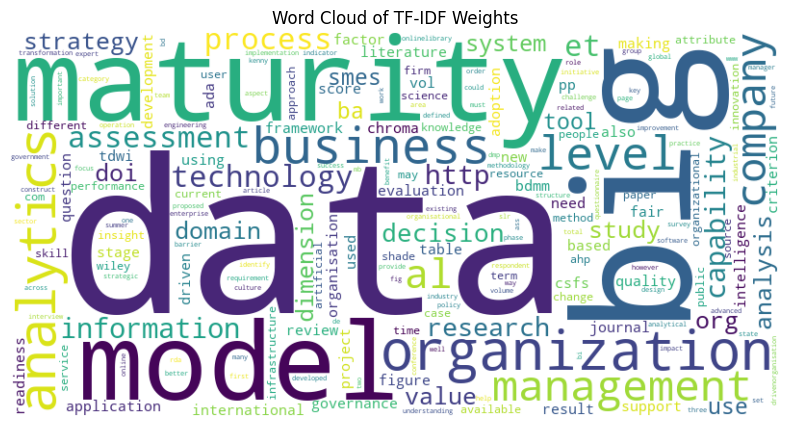

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Calculate sum of TF-IDF weights for each term across all documents
term_frequencies = np.sum(X_tfidf, axis=0)

# Get terms (feature names) from the TF-IDF vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary mapping terms to their corresponding frequencies
term_freq_dict = {term: term_frequencies[0, idx] for idx, term in enumerate(terms)}

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_freq_dict)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Weights')
plt.show()


In [ ]:
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest
import scipy.sparse as sp
from nltk.probability import FreqDist


# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to extract and clean text from a PDF file
def extract_clean_text_from_pdf(pdf_path):
    lemmatizer = WordNetLemmatizer()
    text = ""
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            page_text = page.extract_text()
            if page_text:
                # Adding space around punctuation and fixing concatenated words
                page_text = re.sub(r'([.,;:!?()])', r' \1 ', page_text)
                page_text = re.sub(r'\s{2,}', ' ', page_text)
                text += page_text + " "

    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Normalize white spaces
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english')) | {'http'}  # Add custom stopwords directly
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2 and token.isalpha()]

    return ' '.join(tokens)

# Example PDF paths
pdf_paths = [r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Abdulkhaliq, A. 2018. Big data maturity mode; assessing organizational readiness for the new era of data analytics.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\aDRIAN ET AL. 2016. Towards Developing Strategic Assessment Model for Big Data Implementation.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\aL SAI ET AL. 2020. Critical Success Factors for Big Data; AS SYS LIT REVIEW.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Al sai et al.2023. Big Data Maturity Assessment Models.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Bahim et al. 2020. The FAIR Data Maturity Model.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\comuzzi et al. 2023. How organisations leverage Big Data.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\cORALLO ET AL. 2023. Evaluating maturity level of big data management and analytics in industrial companies.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\EL-DARWICHE etll 2014.Big Data Maturity; An Action Plan for Policymakers and Executives.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Farah.2017. A Value Based Big Data Maturity Model.pdf.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Gokalp, M. et al. 2021. The development of the data science cpability maturity model; a survey-based research.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Gökalp,M.O., 2021 et al.Assessment of processcapabilitiesin transitionto a data driven organisationa multidisciplinary approach.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Halper, F. 2020. TDWI Analytics Maturity Model.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\hELMY ET AL.2022.Analytical Study on Building a Comprehensive Big Data Management.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\kORSTEN ET AL. 2021. ADA CMM; A Capability Maturity Model for Advanced Data Analytics.pdf.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Limpeeticharoenchot ET AL. (2020). Innovative Mobile Application for Measuring Big Data Maturity.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MACKE ET AL. 2017  2023. Measuring your big data maturity.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Malacaria et al. 2023. An Application of the Analytic Hierarchy Process to the Evaluation of Companies Data Maturity.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MENUKIN ET AL. 2023. Guiding the integration of analytics in business operations through a maturity framework.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Mohd et al. 2017. Big data maturity model a preliminary evaluation.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MOHIB ET AL. 2023. How Can SMEs Benefit from Big Data; Challenges and a Path Forward.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Moore, D. 2014. Roadmaps and Maturity models; Pathways toward Adopting Big Data.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MOTJOLOPANE ET AL. 2023.Digital transformation dimensions for evaluating SMEs  readiness for big data analytics and artificial intelligence.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Mouhib, et al. 2020. Towards_a_Global_Big_Data_Maturity_Model.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\mOUHIB.2023.Analyzing the Global Big Data Maturity Model Domains for Better Adoption of Big Data Projects.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\nDA ET AL. 2020. Assessment of big data analytics maturity models; an overview.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\OKUYUCU ET AL.2020.Big data maturity models for the public sector.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PARRA ET AL. 2019. A Maturity Model for the Information-Driven SME.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PENA ET AL. 2019. A fuzzy ELECTRE structure methodology to assess big data maturity in healthcare SMEs.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RAJTERIC . 2010. OVERVIEW OF BUSINESS INTELLIGENCE MATURITY MODELS.pdf",
             r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RETRIALISCA ET AL. 2020.The Maturity Measurement of Big Data Adoption in MC using TDWI MM.pdf"
    ]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common words:
[('data', 7010), ('big', 3494), ('maturity', 3163), ('model', 2727), ('analytics', 1841), ('organization', 1454), ('business', 1443), ('level', 1402), ('management', 1231), ('assessment', 971), ('company', 955), ('technology', 916), ('capability', 915), ('process', 914), ('information', 839), ('research', 770), ('decision', 647), ('study', 640), ('value', 611), ('dimension', 592)]

Binary Term-Document Matrix:
                Document 1  Document 2  Document 3  Document 4  Document 5  \
hboard                   0           0           0           0           0   
convey                   0           0           0           0           0   
massimiliano             0           0           0           0           0   
head                     0           1           0           0           1   
manger                   0           0           0           0           0   
...                    ...         ...         ...         ...         ...   
taught               

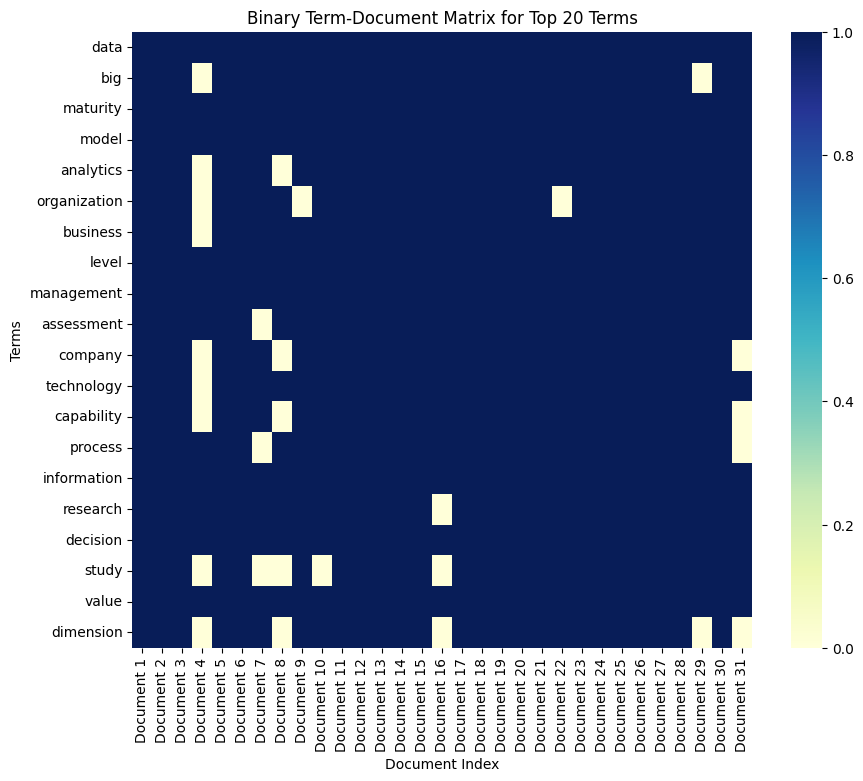

C:\Users\natal\AppData\Local\Temp\ipykernel_17264\250924902.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


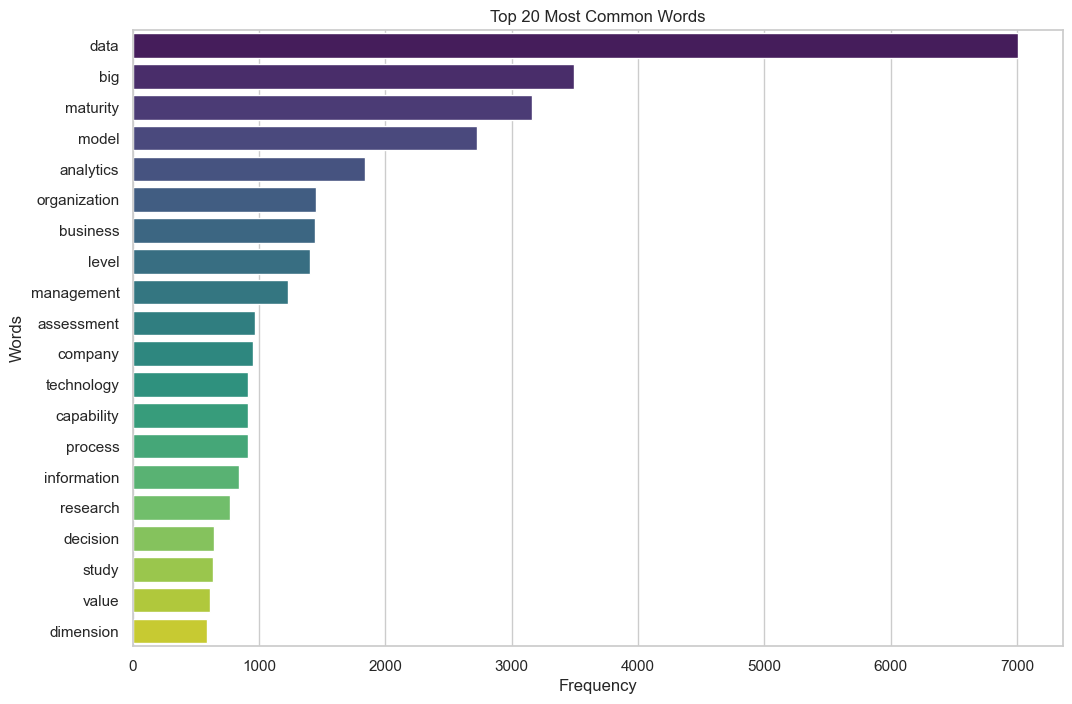

In [1]:

# Extract and clean text from each document
cleaned_documents = [extract_clean_text_from_pdf(pdf) for pdf in pdf_paths]

# Combine all texts into a single corpus for analysis
corpus = ' '.join(cleaned_documents)
tokens = word_tokenize(corpus)
terms = set(tokens)  # Assume all tokens are potential terms for TDM

# Binary term-document matrix creation and formatting as DataFrame
def create_binary_tdm(docs, terms):
    terms = list(terms)
    doc_labels = [f"Document {i+1}" for i in range(len(docs))]  # Naming documents for clarity
    tdm = np.zeros((len(terms), len(docs)), dtype=int)
    for j, doc in enumerate(docs):
        doc_tokens = set(word_tokenize(doc))
        for i, term in enumerate(terms):
            tdm[i, j] = 1 if term in doc_tokens else 0

    # Convert the matrix to a DataFrame for better readability
    return pd.DataFrame(tdm, index=terms, columns=doc_labels)

binary_tdm_df = create_binary_tdm(cleaned_documents, terms)

# Calculate mean and standard deviation for each term's document frequency
mean_freq = np.mean(binary_tdm_df, axis=1)
std_dev_freq = np.std(binary_tdm_df, axis=1)

# Analyze word frequencies and collocations on cleaned text
word_freq = nltk.FreqDist(tokens)

# Output results for review
print("Most common words:")
print(word_freq.most_common(20))
print("\nBinary Term-Document Matrix:")
print(binary_tdm_df)
print("\nMean Frequencies:")
print(mean_freq)
print("\nStandard Deviations:")
print(std_dev_freq)

# Plotting the heatmap of the binary term-document matrix for top 20 terms
top_terms = [term for term, freq in word_freq.most_common(20)]
filtered_tdm = binary_tdm_df.loc[top_terms]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_tdm, cmap="YlGnBu", yticklabels=True, xticklabels=True)
plt.title('Binary Term-Document Matrix for Top 20 Terms')
plt.xlabel('Document Index')
plt.ylabel('Terms')
plt.show()


word_freq = FreqDist(tokens)

# Getting the most common words
most_common_words = word_freq.most_common(20)  # You can adjust the number as needed

# Unpacking the words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Setting the style (optional)
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette='viridis')

# Adding titles and labels
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Displaying the plot
plt.show()



In [4]:
dimensions = ["data management", "business process", "organization’s situation", "data management", "infrastructure", "analytics", "organization", "governance", "intent data", "data technology", "people process", "data management", "strategy efficiency", "effectiveness", "new solutions", "transformation data", "analytics security", "policy", "partnership", "technology staffing", "business focus", "big data management", "governance", "data type", "quality", "business need", "technology platform", "operating model", "analytics", "information management", "technical infrastructure", "data availability", "governance", "data-driven", "decision-making", "organization", "resources", "sponsorship", "vision", "strategy", "value", "metrics", "trust", "privacy", "people", "organization", "data sources", "data management", "analytics", "visualization", "business strategy", "information", "analytics", "operational execution", "cultural execution", "architecture", "organization", "leadership", "data governance", "integration", "data knowledge", "it solutions", "functionalities", "sponsorship", "technology", "infrastructure", "organization", "skills", "process management", "strategic alignment", "data organization", "governance", "information technology", "data management", "strategy", "value", "metrics", "trust", "privacy", "strategic alignment", "organization", "information technology"]
levels = ["nascent",
"pre-adoption",
"early adoption",
"corporate adoption",
"mature/visionary",
"business monitoring",
"business insights",
"business",
"optimization data",
"monetization",
"business metamorphosis",
"ad hoc",
"opportunistic",
"repeatable",
"managed",
"optimized",
"efficiency",
"effectiveness",
"new solutions",
"transformation",
"undergo big data",
"education",
"assess big data",
"readiness",
"pinpoint a killer bd",
"use case",
"structure a big data",
"proof-of-concept project",
"infancy",
"technical adoption",
"business adoption",
"data and analytics as a service",
"performance management",
"functional area excellence",
"value proposition enhancement",
"business model transformation",
"in the dark",
"catching up",
"first pilot",
"first pilots",
"tactical value",
"strategic leverage",
"optimize and extend",
"ad hoc",
"foundational",
"competitive differentiating",
"breakaway",
"ignorance",
"coping",
"understanding",
"managing",
"innovating",
"atemporal",
"pre-temporal",
"partly temporal",
"predominantly temporal",
"temporal",
"aware",
"exploring",
"optimizing",
"transforming",
"non-existent",
"awareness",
"initial",
"repeatable",
"defined",
"managed",
"optimized",
"initial",
"pre-contemplation",
"defined",
"contemplation",
"managed",
"preparation",
"optimized",
"commitment",
"strategic",
"future"]

from collections import Counter
 
# Tokenize the levels list
level_tokens = [word.lower() for word in levels]
 
# Count occurrences of each level word in the corpus
level_counts = Counter(tokens)
 
# Initialize a dictionary to store counts of level words
level_word_counts = {}
 
# Count occurrences of level words in the corpus
for word in level_tokens:
    level_word_counts[word] = level_counts.get(word, 0)
 
# Print the counts of level words
for word, count in level_word_counts.items():
    print(f"{word}: {count}")



nascent: 32
pre-adoption: 0
early adoption: 0
corporate adoption: 0
mature/visionary: 0
business monitoring: 0
business insights: 0
business: 1443
optimization data: 0
monetization: 8
business metamorphosis: 0
ad hoc: 0
opportunistic: 10
repeatable: 25
managed: 78
optimized: 29
efficiency: 36
effectiveness: 27
new solutions: 0
transformation: 125
undergo big data: 0
education: 51
assess big data: 0
readiness: 224
pinpoint a killer bd: 0
use case: 0
structure a big data: 0
proof-of-concept project: 0
infancy: 9
technical adoption: 0
business adoption: 0
data and analytics as a service: 0
performance management: 0
functional area excellence: 0
value proposition enhancement: 0
business model transformation: 0
in the dark: 0
catching up: 0
first pilot: 0
first pilots: 0
tactical value: 0
strategic leverage: 0
optimize and extend: 0
foundational: 8
competitive differentiating: 0
breakaway: 5
ignorance: 3
coping: 4
understanding: 226
managing: 57
innovating: 19
atemporal: 2
pre-temporal: 0
p

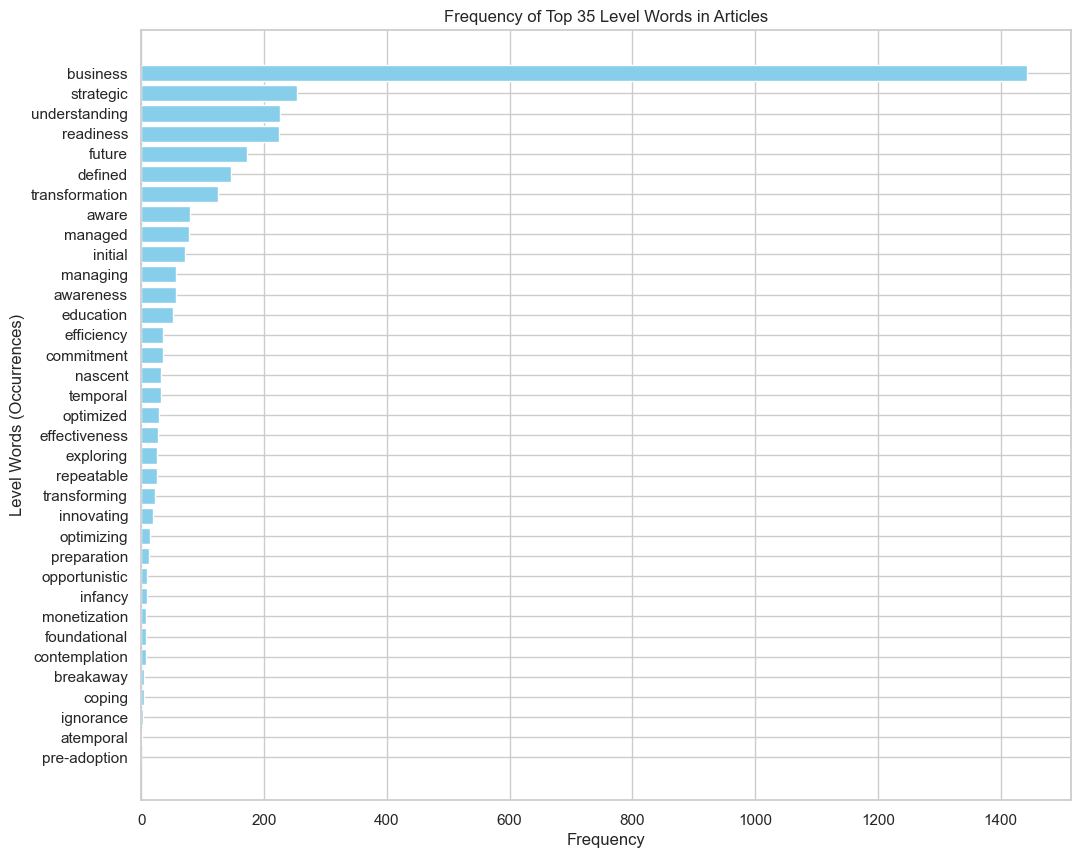

In [16]:

import matplotlib.pyplot as plt
from collections import Counter
 
# Tokenize the levels list
level_tokens = [word.lower() for word in levels]
 
# Count occurrences of each level word in the corpus
level_counts = Counter(tokens)
 
# Initialize a dictionary to store counts of level words
level_word_counts = {}
 
# Count occurrences of level words in the corpus
for word in level_tokens:
    level_word_counts[word] = level_counts.get(word, 0)
 
# Sort the level words by their counts in descending order
sorted_level_word_counts = {k: v for k, v in sorted(level_word_counts.items(), key=lambda item: item[1], reverse=True)}
 
# Take only the first 30 most frequent words
top_30_level_word_counts = dict(list(sorted_level_word_counts.items())[:35])
 
# Unpack the sorted level words and their frequencies for plotting
level_words, level_frequencies = zip(*top_30_level_word_counts.items())
 
# Create a bar plot
plt.figure(figsize=(12, 10))
plt.barh(level_words, level_frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Level Words')
plt.title('Frequency of Top 35 Level Words in Articles')
plt.gca().invert_yaxis()  # Invert y-axis to display the words in descending order of frequency
 
# Add units to the y-axis label
plt.ylabel('Level Words (Occurrences)')
 
plt.show()

In [5]:
# Tokenize the levels list
dimensions_tokens = [word.lower() for word in dimensions]
 
# Count occurrences of each level word in the corpus
dimensions_counts = Counter(tokens)
 
# Initialize a dictionary to store counts of level words
dimensions_word_counts = {}
 
# Count occurrences of level words in the corpus
for word in dimensions_tokens:
    dimensions_word_counts[word] = dimensions_counts.get(word, 0)
 
# Print the counts of level words
for word, count in dimensions_word_counts.items():
    print(f"{word}: {count}")


data management: 0
business process: 0
organization’s situation: 0
infrastructure: 233
analytics: 1841
organization: 1454
governance: 353
intent data: 0
data technology: 0
people process: 0
strategy efficiency: 0
effectiveness: 27
new solutions: 0
transformation data: 0
analytics security: 0
policy: 141
partnership: 17
technology staffing: 0
business focus: 0
big data management: 0
data type: 0
quality: 324
business need: 0
technology platform: 0
operating model: 0
information management: 0
technical infrastructure: 0
data availability: 0
data-driven: 0
decision-making: 0
resources: 0
sponsorship: 36
vision: 57
strategy: 461
value: 611
metrics: 0
trust: 27
privacy: 73
people: 224
data sources: 0
visualization: 40
business strategy: 0
information: 839
operational execution: 0
cultural execution: 0
architecture: 102
leadership: 133
data governance: 0
integration: 120
data knowledge: 0
it solutions: 0
functionalities: 0
technology: 916
skills: 0
process management: 0
strategic alignment: 

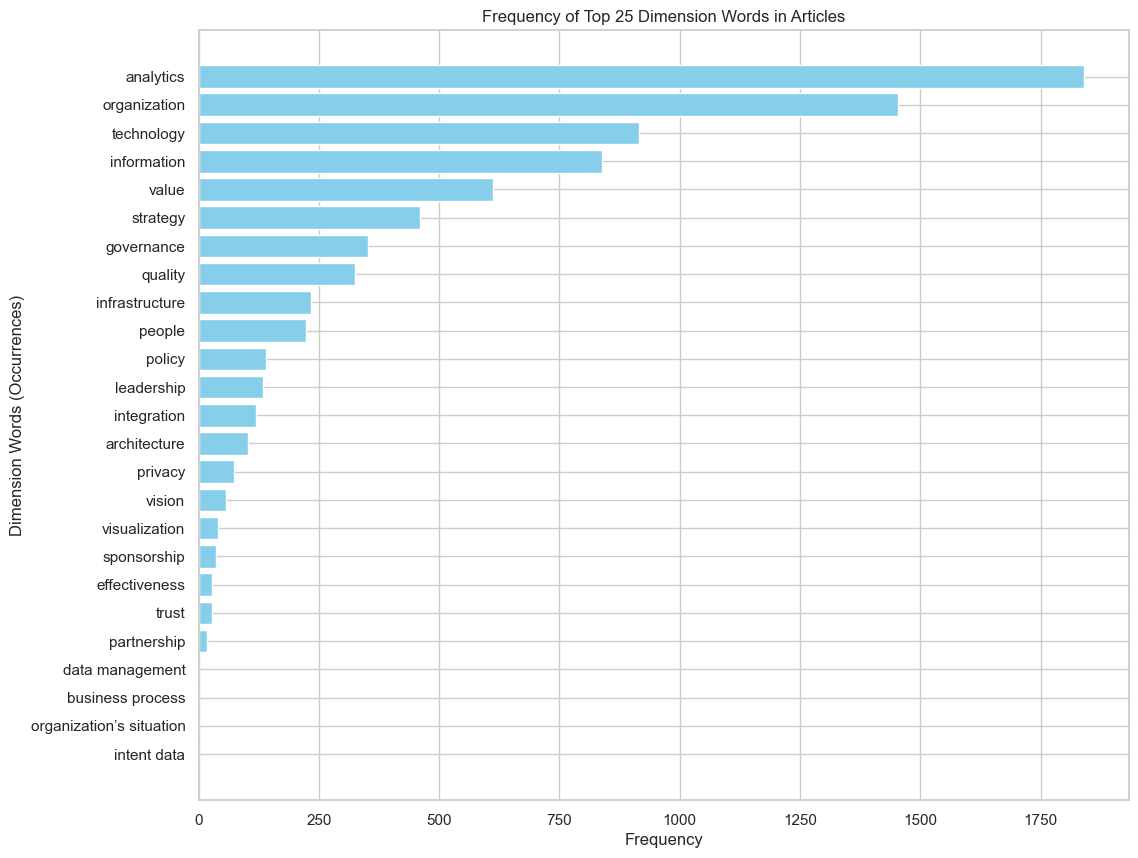

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
 
# Tokenize the levels list
dimensions_tokens = [word.lower() for word in dimensions]
 
# Count occurrences of each level word in the corpus
dimensions_counts = Counter(tokens)
 
# Initialize a dictionary to store counts of level words
dimensions_word_counts = {}
 
# Count occurrences of level words in the corpus
for word in dimensions_tokens:
    dimensions_word_counts[word] = dimensions_counts.get(word, 0)
 
# Sort the level words by their counts in descending order
sorted_dimensions_word_counts = {k: v for k, v in sorted(dimensions_word_counts.items(), key=lambda item: item[1], reverse=True)}
 
# Take only the first 30 most frequent words
top_30_dimensions_word_counts = dict(list(sorted_dimensions_word_counts.items())[:25])
 
# Unpack the sorted level words and their frequencies for plotting
dimensions_words, dimensions_frequencies = zip(*top_30_dimensions_word_counts.items())
 
# Create a bar plot
plt.figure(figsize=(12, 10))
plt.barh(dimensions_words, dimensions_frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Dimension Words')
plt.title('Frequency of Top 25 Dimension Words in Articles')
plt.gca().invert_yaxis()  # Invert y-axis to display the words in descending order of frequency
 
# Add units to the y-axis label
plt.ylabel('Dimension Words (Occurrences)')
 
plt.show()
 

In [24]:
model = ["nascent", "pre-adoption", "adoption", "early adoption", "corporate-level adoption", "mature", "visionary"]

from collections import Counter
 
# Tokenize the levels list
model_tokens = [word.lower() for word in model]
 
# Count occurrences of each level word in the corpus
model_counts = Counter(tokens)
 
# Initialize a dictionary to store counts of level words
model_word_counts = {}
 
# Count occurrences of level words in the corpus
for word in model_tokens:
    model_word_counts[word] = model_counts.get(word, 0)
 
# Print the counts of level words
for word, count in model_word_counts.items():
    print(f"{word}: {count}")

nascent: 32
pre-adoption: 0
adoption: 291
early adoption: 0
corporate-level adoption: 0
mature: 93
visionary: 40
